# Set-Up

In [47]:
# Tratamiento de datos y graficos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Preprocesado y modelado
#=======================================================
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold


# Configuración warnings
# =======================================================
import warnings
warnings.filterwarnings('ignore')


#Automcompletar rápido
%config IPCompleter.greedy=True


# Preprocesamiento de datos


### Importar el data set


In [2]:
df = pd.read_csv('C:/Users/COMPUTADORA/Desktop/DATA SCIENCE FOR BUSINESS/Trabajos personales/PORTFOLIO LABORAL/PORTFOLIO DS/abandono del banco/ML/Churn_Modelling.csv')
df.drop(columns='RowNumber',inplace = True)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### separar categoricas y numericas

In [4]:
cat= df.select_dtypes(exclude = 'number').copy()
num= df.select_dtypes(include='number').copy()


### Codificar datos categóricos


In [6]:
cat.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
var_ohe = ['Geography', 'Gender']

In [8]:
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [9]:
cat_ohe = ohe.fit_transform(cat[var_ohe])

In [10]:
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out())

In [11]:
x = df.drop(columns='Exited')
y = df['Exited']

### Codificar datos numericos

In [12]:
num.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
var_mms = num[['CreditScore',
               'Age', 'Tenure', 'Balance',
               'NumOfProducts', 'HasCrCard',
               'EstimatedSalary',
                       ]]

In [14]:
mms = MinMaxScaler()
df_mms = mms.fit_transform(var_mms)

In [15]:
#Añadir sufijos a los nombres
nombres_mms = [variable + '_mms' for variable in var_mms]

#Guardar como dataframe
df_mms = pd.DataFrame(df_mms,columns = nombres_mms)

In [16]:
df_mms

,CreditScore_mms,Age_mms,Tenure_mms,Balance_mms,NumOfProducts_mms,HasCrCard_mms,EstimatedSalary_mms
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,0.395400
...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.481341
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,0.508490
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,0.210390
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.464429


In [17]:
incluir_pd = [cat_ohe, df_mms]

In [18]:
df_transf = pd.concat(incluir_pd, axis = 1)


### Separar target y predictoras

In [19]:
x = df_transf
y = df['Exited']

# Modelizacion




### Reservar el dataset de validacion

In [32]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

In [33]:
train_x.shape

(7000, 12)


### Creacion de pipeline

In [29]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [    
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['roc_auc'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]



### Entrenamiento

In [34]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__reg_alpha,...,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__scoring,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
224,0.739618,0.007848,0.011102,0.007850,"XGBClassifier(base_score=None, booster=None, c...",0.05,5,100,-1,0.5,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.847014,0.853387,0.849215,0.849872,0.002643,1
23,3.664729,0.039406,0.021856,0.007396,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,500,-1,1,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.847200,0.852492,0.849684,0.849792,0.002162,2
22,3.648508,0.077272,0.022225,0.007711,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,500,-1,1,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.846586,0.852804,0.849586,0.849659,0.002539,3
227,0.734105,0.000025,0.005529,0.007820,"XGBClassifier(base_score=None, booster=None, c...",0.05,5,100,-1,1,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.847430,0.852253,0.848934,0.849539,0.002015,4
21,3.709258,0.139324,0.022564,0.007623,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,500,-1,1,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.846456,0.852430,0.849512,0.849466,0.002439,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0.161264,0.007878,0.016684,0.000003,HistGradientBoostingClassifier(),0.01,20,NaN,NaN,NaN,...,50,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.779140,0.782605,0.766551,0.776099,0.006898,607
507,0.156106,0.015214,0.016641,0.000015,HistGradientBoostingClassifier(),0.01,10,NaN,NaN,NaN,...,50,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.779140,0.782605,0.766551,0.776099,0.006898,607
579,0.166847,0.013618,0.011116,0.007860,HistGradientBoostingClassifier(),0.01,10,NaN,NaN,NaN,...,50,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.779368,0.782562,0.766242,0.776057,0.007062,610
576,0.161283,0.007856,0.016685,0.000005,HistGradientBoostingClassifier(),0.01,5,NaN,NaN,NaN,...,50,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.779368,0.782562,0.766242,0.776057,0.007062,610


### Predecir sobre validación

In [36]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [37]:
roc_auc_score(val_y, pred)

0.8509116935439727

### Examinar el mejor modelo

In [45]:
print(modelo.best_estimator_)

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0.5, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])


# Reporting del Modelo

### Gain Chart

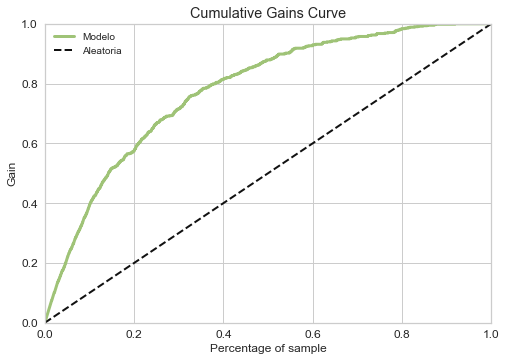

In [48]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

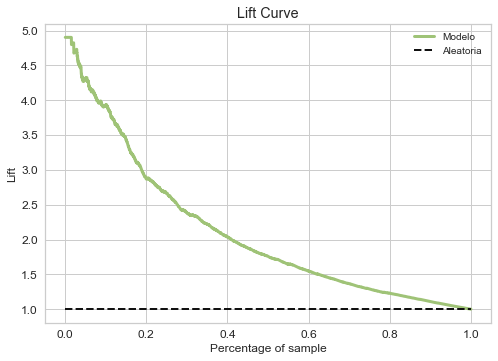

In [49]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

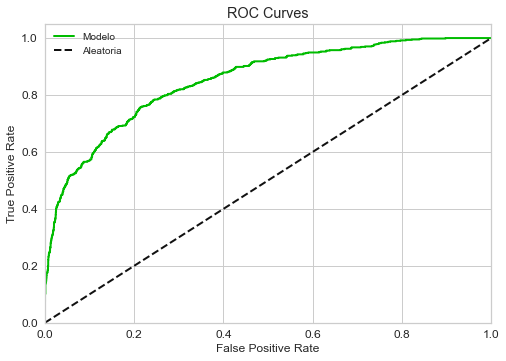

In [50]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);